# Data Mining and machine Learning 
# Experiment 7
## 19 February

# Name: Tufan Kundu
# Reg no.: 24MDT0184

# Decision Tree: Bagging, Boosting, RandomForestClassifier

## Q1. Today we will try to see how bagging, boosting etc can be implemented.


In [5]:
## Loading the necessary libraries
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [6]:
## Loading the dataset

df = pd.read_csv(r"D:\study material\VIT_Data_Science\Winter_Sem\Data Mining and Machine Learning Lab\Class_notes\ML_exp7\liver_patient.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### Dropping the unnecessary Age and Gender column

In [8]:
df.drop(['Age','Gender'],axis=1,inplace = True)

### Perform Min-Max scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df)

In [11]:
x = X[:,:-1]
y = X[:,-1]

## Do the train test split of the data with test size 20%.

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

###  Fit the LogisticRegression model to the this training data.

In [15]:
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)
y_pred_lr = model_lr.predict(x_test)
print(f"The accuracy of the logistic regression model is:{round(accuracy_score(y_test,y_pred_lr)*100,3)} %")

The accuracy of the logistic regression model is:66.667 %


## Next for the same data fit a Decision Tree with the same training data and check for the testing accuracy.

In [17]:
from sklearn.tree import DecisionTreeClassifier

model_dc = DecisionTreeClassifier()
model_dc.fit(x_train,y_train)
y_pred_dc = model_dc.predict(x_test)
print(f"Accuracy score of decision tree:{round(accuracy_score(y_test,y_pred_dc)*100,2)}%")

Accuracy score of decision tree:63.25%


### - The accuracy of the logistic regression model is:66.667 % 
### - Accuracy score of decision tree:60.68%

# Bagging: Bagging Classfier and Bagging regressor.

In [20]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
BC = BaggingClassifier(n_estimators = 100,random_state = 0) 
#n_estimator is number of trees we are fitting for bagging
BC.fit(x_train,y_train)
print(BC.predict(x_test))
print(accuracy_score(BC.predict(x_test),y_test)*100)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1.]
67.52136752136752


## For pasting

In [22]:
PBC = BaggingClassifier(n_estimators = 100,random_state = 0, bootstrap=False) 
#bootstrap = False is samples are drawn with replacement
PBC.fit(x_train,y_train)
print(PBC.predict(x_test))
print(accuracy_score(PBC.predict(x_test),y_test)*100)

[0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
62.39316239316239


## Implementation of Random Forest classifier

In [24]:
RFC = RandomForestClassifier(n_estimators=100, max_features='sqrt',random_state=0)
RFC.fit(x_train,y_train)
print(RFC.predict(x_test))
print(accuracy_score(RFC.predict(x_test),y_test)*100)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.]
68.37606837606837


## Checking the crucial features

In [26]:
print(RFC.feature_importances_)

[0.11831252 0.07608059 0.17098602 0.16769726 0.1466726  0.11859783
 0.1066352  0.09501798]


## - Features with large score were crucial in modelling

## Q2. Form a synthetic dataset using the make classification class which we have used in the previous labs with two features and 3 classes. Fit the decisiontreeclassfier,baggingclassifier and randomforestclassifier and print the decsion boundaries for the different classifiers. Visualizing in the previous case is not possible so we can see how the nonlinear boundaries are getting created in these models except for a linear boundary that we have seen by other classifiers in the previous labs.

In [29]:
from sklearn.datasets import make_classification
# generating a fake data first
x, y = make_classification(
 n_samples=200, # total numner of samples in the dataset
 n_features=2,
 n_classes= 3,
 n_redundant=0,
 n_clusters_per_class=1, # number of cluster per class
 random_state=0)


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Fitting decision tree classifier

In [32]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(x_train,y_train)
y_pred_dc = model_dtc.predict(x_test)
print(f"Accuracy score of decision tree:{round(accuracy_score(y_test,y_pred_dc)*100,2)}%")

Accuracy score of decision tree:80.0%


### Bagging classifier

In [34]:
BC = BaggingClassifier(n_estimators = 100,random_state = 0) 
#n_estimator is number of trees we are fitting for bagging
BC.fit(x_train,y_train)

print(accuracy_score(BC.predict(x_test),y_test)*100)

85.0


### Random forest classifier

In [36]:
RFC = RandomForestClassifier(n_estimators=100, max_features='sqrt',random_state=42)
RFC.fit(x_train,y_train)
print(accuracy_score(RFC.predict(x_test),y_test)*100)

87.5


## Decision boundary for random forest

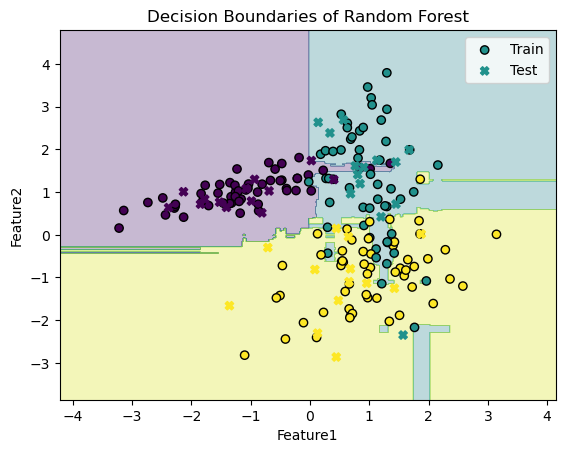

In [38]:
import matplotlib.pyplot as plt
x_min,x_max = x[:,0].min()-1, x[:,0].max()+1
y_min,y_max = x[:,1].min()-1,x[:,1].max()+1
xx,yy = np.meshgrid(np.linspace(x_min,x_max,500),np.linspace(y_min,y_max,500))
z = RFC.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx,yy,z,alpha = 0.3)
plt.scatter(x_train[:,0],x_train[:,1],c = y_train,edgecolors='k',label = 'Train')
plt.scatter(x_test[:,0],x_test[:,1],c = y_test,marker='X',label = 'Test')
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Decision Boundaries of Random Forest")
plt.legend()
plt.show()

## Decision boundary for Decision tree

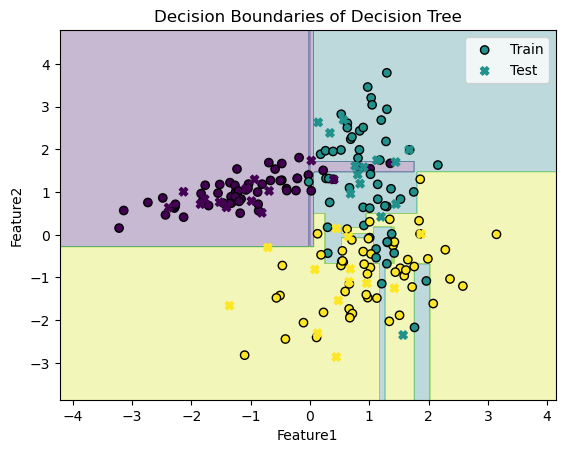

In [40]:
x_min,x_max = x[:,0].min()-1, x[:,0].max()+1
y_min,y_max = x[:,1].min()-1,x[:,1].max()+1
xx,yy = np.meshgrid(np.linspace(x_min,x_max,500),np.linspace(y_min,y_max,500))
z = model_dtc.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx,yy,z,alpha = 0.3)
plt.scatter(x_train[:,0],x_train[:,1],c = y_train,edgecolors='k',label = 'Train')
plt.scatter(x_test[:,0],x_test[:,1],c = y_test,marker='X',label = 'Test')
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Decision Boundaries of Decision Tree")
plt.legend()
plt.show()

## Decision boundary for bagging classifier

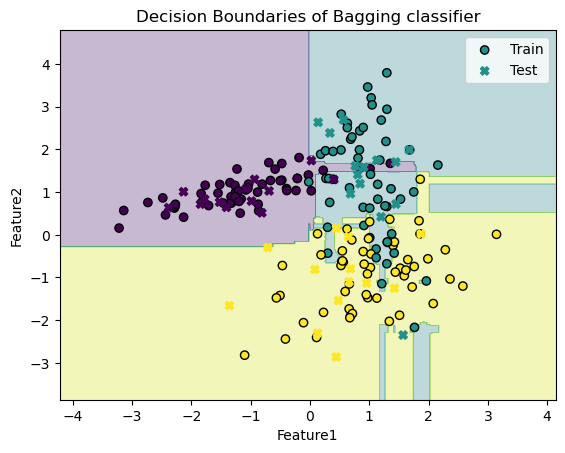

In [42]:
x_min,x_max = x[:,0].min()-1, x[:,0].max()+1
y_min,y_max = x[:,1].min()-1,x[:,1].max()+1
xx,yy = np.meshgrid(np.linspace(x_min,x_max,500),np.linspace(y_min,y_max,500))
z = BC.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx,yy,z,alpha = 0.3)
plt.scatter(x_train[:,0],x_train[:,1],c = y_train,edgecolors='k',label = 'Train')
plt.scatter(x_test[:,0],x_test[:,1],c = y_test,marker='X',label = 'Test')
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Decision Boundaries of Bagging classifier")
plt.legend()
plt.show()

## Voting Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from  sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(random_state=0)
sm_clf = LogisticRegression(multi_class='multinomial')
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('sm',sm_clf)],
                              voting = 'hard')
voting_clf.fit(x_train,y_train)
print(accuracy_score(y_test,voting_clf.predict(x_test))*100)

82.5


## Change to voting criteria to soft by setting voting = ’soft’ and check the output in the above case. In the case of soft voting the models output a probability that is averaged and used for prediction

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from  sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(random_state=0)
sm_clf = LogisticRegression(multi_class='multinomial')
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('sm',sm_clf)],
                              voting = 'soft')
voting_clf.fit(x_train,y_train)
print(accuracy_score(y_test,voting_clf.predict(x_test))*100)

90.0


# Adaboost Classifier

In [48]:
from sklearn.ensemble import AdaBoostClassifier
base_model = DecisionTreeClassifier(max_depth=1)
ABC = AdaBoostClassifier(estimator=base_model,n_estimators=500, random_state=0)
ABC.fit(x_train, y_train)
pred_ABC = ABC.predict(x_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, pred_ABC)*100)

C:\Users\TUFAN\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 87.5


## Hyper parameter tuning for Randomforest

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = {
'n_estimators': [10, 50, 100, 200, 300, 400, 500, 700],
'max_depth': [3,5,7],
'min_samples_leaf': [1, 2, 4]
}
model = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Best Cross-validation Accuracy:", grid_search.best_score_)
print("Test Accuracy:", accuracy)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 50}
Best Cross-validation Accuracy: 0.875
Test Accuracy: 0.95


## Hyper parameter tuning for Adaboost

In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {
'n_estimators': [10, 50, 75,100,125,150, 200, 400, 500],
'estimator__max_depth':[1,2,3]
}
base_model = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(estimator=base_model, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Best Cross-validation Accuracy:", grid_search.best_score_)
print("Test Accuracy:", accuracy*100)


C:\Users\TUFAN\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'estimator__max_depth': 3, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.85625
Test Accuracy: 82.5


## Now you can try to fit the multiple regression model, DecisionTreeRegressor, BaggingRegressor, RandomForestRegressor and AdaboostRegressor on the Book1.csv file and use the mean squared error to see how these ensemble models perform compared to the basic models.

In [54]:
## Loading the datatset
df = pd.read_csv(r"D:\study material\VIT_Data_Science\Winter_Sem\Data Mining and Machine Learning Lab\Class_notes\ML_exp7\Book1.csv")
df.drop('furnishingstatus',axis=1,inplace = True)

In [55]:
df

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
244,4550000,5320,3,1,2,0
245,4550000,5360,3,1,2,2
246,4550000,3520,3,1,1,0
247,4550000,8400,4,1,4,3


In [56]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df)
x = X[:,1:]
y = X[:,0]

In [57]:
## Train test splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Fitting basic linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model_lin = LinearRegression()
model_lin.fit(x_train,y_train)
y_pred = model_lin.predict(x_test)
print("MSE:",mean_squared_error(y_pred,y_test))
print("r2 score:",r2_score(y_test,y_pred))

MSE: 0.020077937566470735
r2 score: 0.18380110609849787


## Using decision tree


In [59]:
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor()
model_dtr.fit(x_train,y_train)
y_pred = model_dtr.predict(x_test)
print("MSE:",mean_squared_error(y_pred,y_test))
print("r2 score:",r2_score(y_test,y_pred))

MSE: 0.03563891581467928
r2 score: -0.448776477737753


## Using BaggingRegressor

In [61]:
from sklearn.ensemble import BaggingRegressor
model_bag = BaggingRegressor()
model_bag.fit(x_train,y_train)
y_pred = model_bag.predict(x_test)
print("MSE:",mean_squared_error(y_pred,y_test))
print("r2 score:",r2_score(y_test,y_pred))

MSE: 0.02041296729735849
r2 score: 0.1701816347325068


## Using pasting

In [63]:
from sklearn.ensemble import BaggingRegressor
model_paste = BaggingRegressor(bootstrap=False)
model_paste.fit(x_train,y_train)
y_pred = model_paste.predict(x_test)
print("MSE:",mean_squared_error(y_pred,y_test))
print("r2 score:",r2_score(y_test,y_pred))

MSE: 0.034137753323409306
r2 score: -0.38775192474845155


## Using randomforest regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, max_features='sqrt',random_state=0)
model_rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)
print("MSE:",mean_squared_error(y_pred,y_test))
print("r2 score:",r2_score(y_test,y_pred))

MSE: 0.02006166312349716
r2 score: 0.1844626871154682


## Using Adaboost regressor

In [67]:
from sklearn.ensemble import AdaBoostRegressor
base_model = DecisionTreeRegressor(max_depth=1)
ABR = AdaBoostRegressor(estimator=base_model,n_estimators=500, random_state=0)
ABR.fit(x_train,y_train)
y_pred = ABR.predict(x_test)
print("MSE:",mean_squared_error(y_pred,y_test))
print("r2 score:",r2_score(y_test,y_pred))

MSE: 0.02265054829239708
r2 score: 0.0792205423832919
